In [1]:
import numpy as np
import pandas as pd
# Each column represents one of the venues to be ranked, and terms are the words of the preprocessed titles of all published papers in those venues in recent years. Each matrix entry indicates the frequency of the corresponding term in the corresponding venue.
# Define product categories and fictional customer names
Keyword = ["Algorithm", "Celluar", "Game", "Hardware", "Internet", "Mobil", "Network", "Search", "Secur", "Web"]

venue = ["CAMAD", "EUNICE", "HAISA", "HPCC-ICESS", "IJESMA", "ISCA", "KMIS", "NMR", "SPRINGL", "SSV"]
term_document_matrix = np.array([
    [2, 8, 0, 24, 0, 5, 0, 2, 1, 1],
    [2, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
    [1, 0, 1, 4, 0, 18, 0, 0, 1, 0],
    [2, 6, 2, 0, 2, 0, 0, 0, 0, 0],
    [10, 8, 0, 6, 17, 5, 2, 0, 2, 0],
    [58, 60, 4, 38, 2, 25, 12, 0, 3, 0],
    [0, 1, 0, 1, 2, 4, 1, 0, 0, 0],
    [4, 4, 29, 5, 1, 12, 3, 0, 4, 0],
    [0, 2, 0, 3, 3, 1, 13, 0, 2, 0]
])

# Create a DataFrame for better visualization
term_document_df = pd.DataFrame(np.array([
    [2, 8, 0, 24, 0, 5, 0, 2, 1, 1],
    [2, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
    [1, 0, 1, 4, 0, 18, 0, 0, 1, 0],
    [2, 6, 2, 0, 2, 0, 0, 0, 0, 0],
    [10, 8, 0, 6, 17, 5, 2, 0, 2, 0],
    [58, 60, 4, 38, 2, 25, 12, 0, 3, 0],
    [0, 1, 0, 1, 2, 4, 1, 0, 0, 0],
    [4, 4, 29, 5, 1, 12, 3, 0, 4, 0],
    [0, 2, 0, 3, 3, 1, 13, 0, 2, 0]
]), index=Keyword, columns=venue)

# Display the term-document matrix
print("Customers and Products Term-Document Matrix:")
term_document_df


Customers and Products Term-Document Matrix:


,CAMAD,EUNICE,HAISA,HPCC-ICESS,IJESMA,ISCA,KMIS,NMR,SPRINGL,SSV
Algorithm,2,8,0,24,0,5,0,2,1,1
Celluar,2,1,0,1,0,0,0,0,0,0
Game,1,1,0,1,0,0,1,1,0,0
Hardware,1,0,1,4,0,18,0,0,1,0
Internet,2,6,2,0,2,0,0,0,0,0
Mobil,10,8,0,6,17,5,2,0,2,0
Network,58,60,4,38,2,25,12,0,3,0
Search,0,1,0,1,2,4,1,0,0,0
Secur,4,4,29,5,1,12,3,0,4,0
Web,0,2,0,3,3,1,13,0,2,0


In [2]:
non_zero_ratio = np.count_nonzero(term_document_matrix) / term_document_matrix.size
non_zero_ratio

0.58

In [3]:
U, S, VT = np.linalg.svd(term_document_df)

print("U matrix:")
print(U)

print("\nS matrix (singular values):")
print(np.diag(S))

print("\nVT matrix:")
print(VT)


U matrix:
[[-1.77392222e-01  2.47583270e-02  8.96880813e-01 -3.64752904e-02
   3.67181115e-01 -1.51664284e-01  6.15469696e-02  1.50286482e-02
   1.22693917e-02  1.43153797e-02]
 [-2.19574904e-02 -1.56980905e-02 -1.31492676e-02 -1.46792156e-02
   1.63797147e-02 -3.07958510e-02 -2.20112486e-01 -2.66045254e-02
  -2.11542026e-01  9.50662422e-01]
 [-1.74723466e-02 -8.90072573e-03  7.63070719e-03  9.71543749e-04
   4.34842750e-02  5.24548578e-02 -4.64561609e-02 -9.95045269e-01
   4.27067388e-02 -2.85797136e-02]
 [-7.55161624e-02  2.60506571e-01  3.43116152e-01  1.87741407e-01
  -8.31624436e-01  1.51241160e-01  6.45010814e-02 -2.29974071e-02
   2.14334035e-01  9.14148034e-02]
 [-5.07140727e-02  1.38960177e-02 -1.37482986e-01  3.23611500e-02
   9.93294471e-02 -1.09208328e-01  9.14056319e-01 -4.17218557e-02
   2.31408453e-01  2.54369477e-01]
 [-1.58522268e-01 -6.71508172e-03 -9.60601576e-02  8.90656499e-01
   1.12136367e-01 -3.73148301e-01 -1.23904580e-01 -2.49642422e-03
   6.93295800e-02 -1.86

In [4]:
u_12 = U[:, :2]
u_12[:, 0] *= -1
u_12

array([[ 0.17739222,  0.02475833],
       [ 0.02195749, -0.01569809],
       [ 0.01747235, -0.00890073],
       [ 0.07551616,  0.26050657],
       [ 0.05071407,  0.01389602],
       [ 0.15852227, -0.00671508],
       [ 0.95613799, -0.15803154],
       [ 0.02407655,  0.04945573],
       [ 0.13180279,  0.95001312],
       [ 0.04678839,  0.03185504]])

In [5]:
projected_matrix = term_document_df @ u_12
# Normalize each column to have a norm <= 1
column_norms = np.linalg.norm(projected_matrix, axis=0)
normalized_matrix = projected_matrix / column_norms

# Print the original matrix, U12, and the projected/normalized matrix
print("Original Matrix:")
print(term_document_matrix)

print("\nU12 Matrix:")
print(u_12)

print("\nProjected/Normalized Matrix:")
print(normalized_matrix)

Original Matrix:
[[ 2  8  0 24  0  5  0  2  1  1]
 [ 2  1  0  1  0  0  0  0  0  0]
 [ 1  1  0  1  0  0  1  1  0  0]
 [ 1  0  1  4  0 18  0  0  1  0]
 [ 2  6  2  0  2  0  0  0  0  0]
 [10  8  0  6 17  5  2  0  2  0]
 [58 60  4 38  2 25 12  0  3  0]
 [ 0  1  0  1  2  4  1  0  0  0]
 [ 4  4 29  5  1 12  3  0  4  0]
 [ 0  2  0  3  3  1 13  0  2  0]]

U12 Matrix:
[[ 0.17739222  0.02475833]
 [ 0.02195749 -0.01569809]
 [ 0.01747235 -0.00890073]
 [ 0.07551616  0.26050657]
 [ 0.05071407  0.01389602]
 [ 0.15852227 -0.00671508]
 [ 0.95613799 -0.15803154]
 [ 0.02407655  0.04945573]
 [ 0.13180279  0.95001312]
 [ 0.04678839  0.03185504]]

Projected/Normalized Matrix:
                  0         1
Algorithm  0.096170  0.496166
Celluar    0.012936  0.020217
Game       0.035899  0.011058
Hardware   0.099600  0.129619
Internet   0.017817 -0.002382
Mobil      0.178293  0.238467
Network    0.871806  0.767355
Search     0.051175  0.006025
Secur      0.201089  0.298108
Web        0.379695  0.043323


In [6]:
normalized_matrix

,0,1
Algorithm,0.096170,0.496166
Celluar,0.012936,0.020217
Game,0.035899,0.011058
Hardware,0.099600,0.129619
Internet,0.017817,-0.002382
Mobil,0.178293,0.238467
Network,0.871806,0.767355
Search,0.051175,0.006025
Secur,0.201089,0.298108
Web,0.379695,0.043323


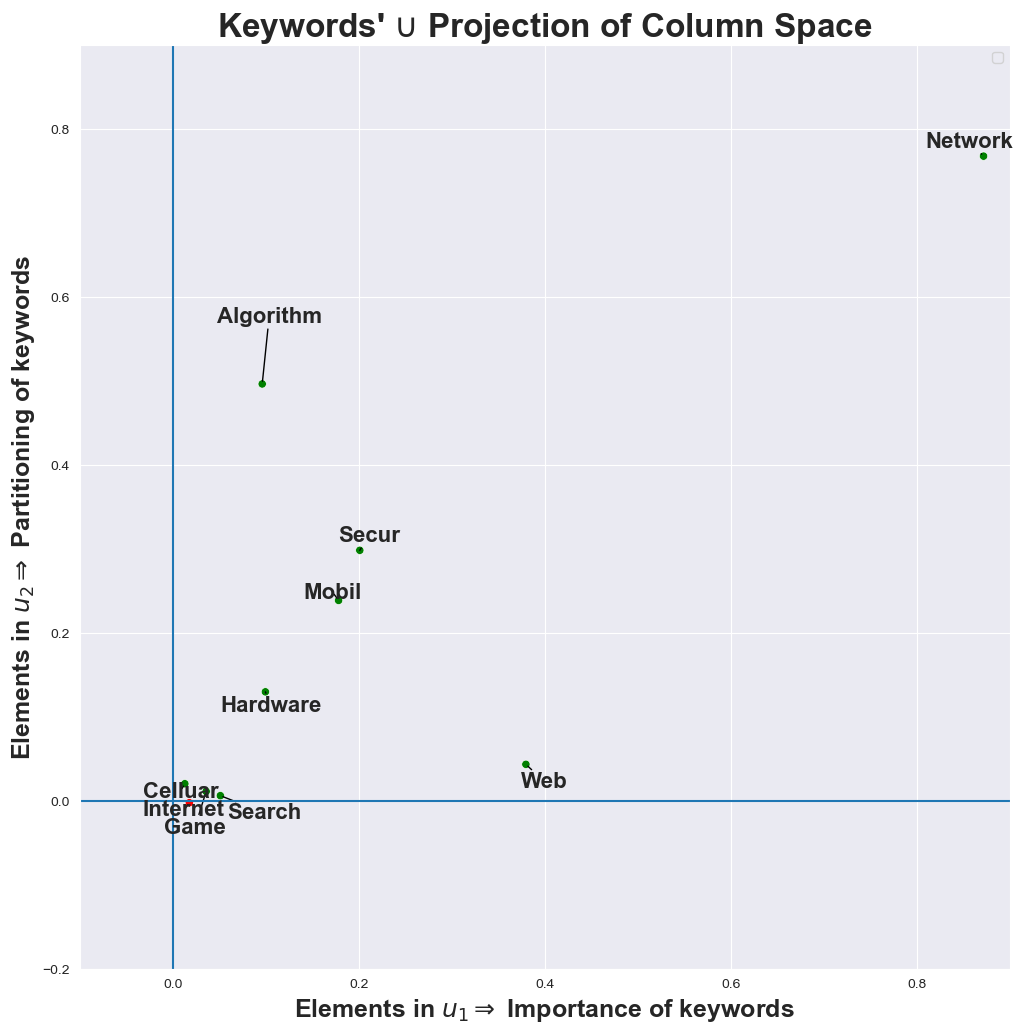

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
plt.figure(figsize=(12, 12))
sns.scatterplot(x=normalized_matrix.iloc[:, 0], y=normalized_matrix.iloc[:, 1], hue=normalized_matrix.iloc[:, 1] > 0, palette={True: 'green', False: 'red'})
# Create a list of text labels
labels = [str(index_label) for index_label in normalized_matrix.index]

# Add the text labels with adjust_text
texts = [plt.text(normalized_matrix.iloc[i, 0], normalized_matrix.iloc[i, 1], label, fontsize=16, weight='bold') for i, label in enumerate(labels)]
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'), expand_axes=True, explode_radius=999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999, min_arrow_len=0.000000000000000000000001, ensure_inside_axes=True)

plt.title(r"Keywords' $\cup$ Projection of Column Space", fontsize=24, weight='bold')  # Using the union symbol
plt.xlabel(r"Elements in $u_1 \Rightarrow$ Importance of keywords", fontsize=18, weight='bold')
plt.xlim(-0.1, 0.9)
plt.ylim(-0.2, 0.9)
plt.ylabel(r"Elements in $u_2 \Rightarrow$ Partitioning of keywords", fontsize=18, weight='bold')
plt.axhline()
plt.axvline()
plt.legend([])

In [8]:
v_12 = VT.T[:, :2]
v_12[:, 0] *= -1
v_12

array([[ 5.80955621e-01, -1.65170341e-01],
       [ 6.09749122e-01, -1.72572391e-01],
       [ 7.81490006e-02,  8.75045229e-01],
       [ 4.26582848e-01,  1.48343813e-02],
       [ 5.02319783e-02,  2.38669713e-02],
       [ 2.86345150e-01,  4.00699315e-01],
       [ 1.28213428e-01,  4.48642494e-02],
       [ 3.71834421e-03,  1.30633140e-03],
       [ 4.05454921e-02,  1.17765027e-01],
       [ 1.77190949e-03,  7.96302863e-04]])

In [9]:
projected_matrix = term_document_df @ v_12
# Normalize each column to have a norm <= 1
column_norms = np.linalg.norm(projected_matrix, axis=0)
normalized_matrix = projected_matrix / column_norms

# Print the original matrix, U12, and the projected/normalized matrix
print("Original Matrix:")
print(term_document_matrix)

print("\nU12 Matrix:")
print(v_12)

print("\nProjected/Normalized Matrix:")
print(normalized_matrix)

Original Matrix:
[[ 2  8  0 24  0  5  0  2  1  1]
 [ 2  1  0  1  0  0  0  0  0  0]
 [ 1  1  0  1  0  0  1  1  0  0]
 [ 1  0  1  4  0 18  0  0  1  0]
 [ 2  6  2  0  2  0  0  0  0  0]
 [10  8  0  6 17  5  2  0  2  0]
 [58 60  4 38  2 25 12  0  3  0]
 [ 0  1  0  1  2  4  1  0  0  0]
 [ 4  4 29  5  1 12  3  0  4  0]
 [ 0  2  0  3  3  1 13  0  2  0]]

U12 Matrix:
[[ 5.80955621e-01 -1.65170341e-01]
 [ 6.09749122e-01 -1.72572391e-01]
 [ 7.81490006e-02  8.75045229e-01]
 [ 4.26582848e-01  1.48343813e-02]
 [ 5.02319783e-02  2.38669713e-02]
 [ 2.86345150e-01  4.00699315e-01]
 [ 1.28213428e-01  4.48642494e-02]
 [ 3.71834421e-03  1.30633140e-03]
 [ 4.05454921e-02  1.17765027e-01]
 [ 1.77190949e-03  7.96302863e-04]]

Projected/Normalized Matrix:
                  0         1
Algorithm  0.177392  0.024758
Celluar    0.021957 -0.015698
Game       0.017472 -0.008901
Hardware   0.075516  0.260507
Internet   0.050714  0.013896
Mobil      0.158522 -0.006715
Network    0.956138 -0.158032
Search     0.02407

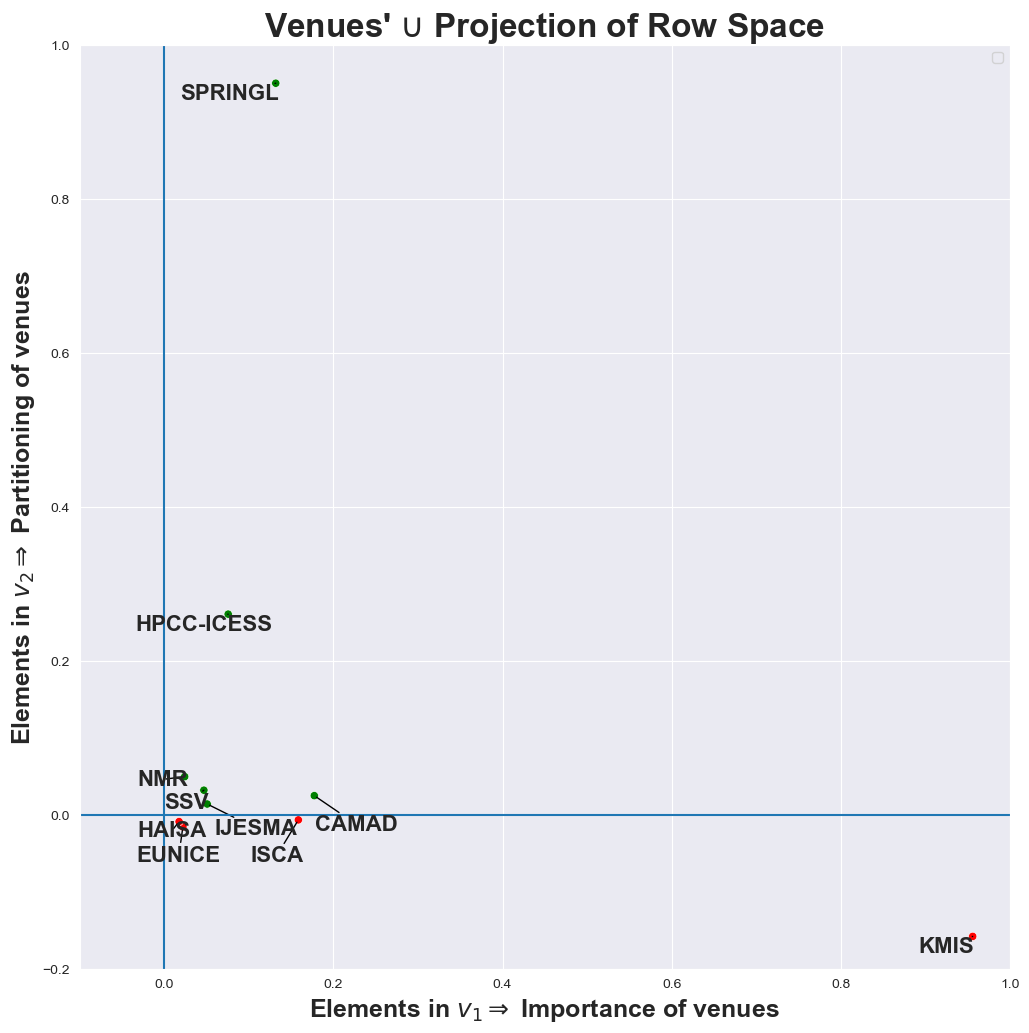

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 12))
sns.scatterplot(x=normalized_matrix.iloc[:, 0], y=normalized_matrix.iloc[:, 1], hue=normalized_matrix.iloc[:, 1] > 0, palette={True: 'green', False: 'red'})
# Create a list of text labels
labels = [str(index_label) for index_label in normalized_matrix.index]

# Add the text labels with adjust_text
texts = [plt.text(normalized_matrix.iloc[i, 0], normalized_matrix.iloc[i, 1], label, fontsize=16, weight='bold') for i, label in enumerate(venue)]
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'), expand_axes=True, explode_radius=999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999, min_arrow_len=0.000000000000000000000001, ensure_inside_axes=True)

plt.title(r"Venues' $\cup$ Projection of Row Space", fontsize=24, weight='bold')  # Using the union symbol
plt.xlabel(r"Elements in $v_1 \Rightarrow$ Importance of venues", fontsize=18, weight='bold')
plt.xlim(-0.1, 1)
plt.ylim(-0.2, 1)
plt.ylabel(r"Elements in $v_2 \Rightarrow$ Partitioning of venues", fontsize=18, weight='bold')
plt.axhline()
plt.axvline()
plt.legend([])